In [ ]:
!pip install pandas numpy sklearn lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=605b0c19923915d3492898e1aef3f474365a907099958c4dcee2516324a2199d
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn


In [ ]:
import pandas as pd
import numpy as np

data= pd.read_csv('cowprice3.csv')
# 결측치 확인
print("Missing values before imputation:")
print(data.isnull().sum())

# 결측치 중앙값으로 대체
data = data.fillna(data.median())
data.head(10)

Missing values before imputation:
date                  0
Cattle_Judged         1
Cattle_Trade_Meat     1
Corn                  0
Soybean               0
WTi                   0
bey                   0
ondo                  0
do                   95
avggram              95
fourth                0
rain                  0
CattlePrice           1
fcow                 51
mcow                 51
sooch                 2
avg                   2
1stavg1               2
1stavg2              14
1stavg3               1
numnong               0
numcow                0
dtype: int64


,date,Cattle_Judged,Cattle_Trade_Meat,Corn,Soybean,WTi,bey,ondo,do,avggram,...,CattlePrice,fcow,mcow,sooch,avg,1stavg1,1stavg2,1stavg3,numnong,numcow
0,20180102,771.0,195.0,139.06,354.48,60.37,159.74,-1.8,514.0,1880.0,...,80530.0,2847.0,3420.0,5943.0,16590.0,17446.0,49300.0,80530.0,93286,2801374
1,20180103,5285.0,1495.0,138.96,355.95,61.63,162.03,-4.7,9216.0,4270.0,...,80095.0,2839.0,3491.0,6394.0,17849.0,17851.0,50723.0,80095.0,93286,2801374
2,20180104,4773.0,1336.0,138.18,355.58,62.01,161.58,-4.7,11741.0,5060.0,...,80021.0,2841.0,3396.0,6440.0,17978.0,18168.0,50726.0,80021.0,93286,2801374
3,20180105,3930.0,1085.0,138.28,356.68,61.44,160.75,-3.0,11482.0,5270.0,...,80021.0,2840.0,3394.0,6451.0,18010.0,18349.0,48555.0,80021.0,93286,2801374
4,20180108,1390.0,380.0,136.70,355.21,61.73,159.19,1.3,6819.0,3411.0,...,79505.0,2902.0,3480.0,6241.0,17424.0,17775.0,52000.0,79505.0,93286,2801374
5,20180109,5520.0,1558.0,137.39,354.11,62.96,161.30,-4.2,9423.0,4187.0,...,79505.0,2914.0,3466.0,6517.0,18194.0,18327.0,50058.0,79505.0,93286,2801374
6,20180110,4939.0,1395.0,137.39,350.90,63.57,161.85,-7.5,9507.0,4173.0,...,79505.0,2872.0,3424.0,6466.0,18052.0,18281.0,51213.0,79505.0,93286,2801374
7,20180111,4826.0,1355.0,137.29,349.06,63.80,161.76,-11.1,9660.0,4223.0,...,81782.0,2915.0,3477.0,6412.0,17901.0,18053.0,50167.0,81782.0,93286,2801374
8,20180112,4498.0,1263.0,136.31,352.92,64.30,156.62,-10.2,10203.0,4251.0,...,81566.0,2925.0,3483.0,6152.0,17176.0,17608.0,51580.0,81566.0,93286,2801374
9,20180116,5665.0,1609.0,137.09,355.67,63.73,155.05,3.5,10376.0,4274.0,...,81713.0,2945.0,3579.0,6268.0,17498.0,17466.0,47936.0,81713.0,93286,2801374


In [ ]:
# 결측치 확인 (대체 후)
print("\nMissing values after imputation:")
print(data.isnull().sum())

def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df

# 이상치 제거할 열의 리스트
columns = ['Cattle_Judged','Corn', 'Soybean', 'WTi', 'fourth', 'numcow', 'CattlePrice','numnong','bey','do']


# 이상치 제거
df = remove_outliers(data, columns)

# 결과 확인
print(df.shape)



Missing values after imputation:
date                 0
Cattle_Judged        0
Cattle_Trade_Meat    0
Corn                 0
Soybean              0
WTi                  0
bey                  0
ondo                 0
do                   0
avggram              0
fourth               0
rain                 0
CattlePrice          0
fcow                 0
mcow                 0
sooch                0
avg                  0
1stavg1              0
1stavg2              0
1stavg3              0
numnong              0
numcow               0
dtype: int64
(1142, 22)


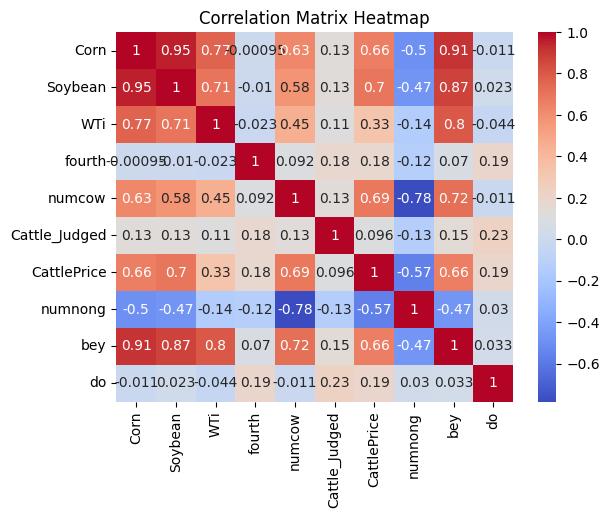

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 예시 데이터 생성
selected_cols =['Corn', 'Soybean', 'WTi', 'fourth', 'numcow','Cattle_Judged', 'CattlePrice','numnong','bey','do']

data=df[selected_cols]

df = pd.DataFrame(data)

# 상관 행렬 계산
correlation_matrix = df.corr()

# 상관 관계 히트맵 시각화
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 피쳐와 타겟 분리
features = df[['Corn','fourth','do','Cattle_Judged']]
target = df['CattlePrice']

# 데이터 스케일링
scaler = StandardScaler()
features = scaler.fit_transform(features)

# 트레인, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [ ]:
def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}

print(processSubset(X_train, y_train, features))

processSubset(X_train, y_train, features)

import time
import itertools

# getBest : 가장 낮은 AIC를 가지는 모델을 선택하고 저장하는 함수

def getBest(X,y,k):
    tic = time.time()      # 시작 시간
    results = []           # 결과 저장 공간
    for combo in itertools.combinations(X.columns.difference(['const'],k)) :
		# 각 변수 조합을 고려한 경우의수

        combo = (list(combo)+['const'])
        # 상수항을 추가하여 combo를 결성

        results.append(processSubset(X,y,feature_set = combo)) # 모델링된것을 저장

        # 만약 k=2이면 여기서 두가지 변수만 뽑아서 경우의 수를 분석하여
        # 저장 후 그 중 AIC가 가장 낮은 모델을 선택하도록 함

    models = pd.DataFrame(results) # 데이터프레임으로 모델결과 변환
    best_model = models.loc[models['AIC'].argmin()] # argmin은 최소값의 인덱스를 뽑는 함수
    toc = time.time()       # 종료 시간
    print("Processed", models.shape[0], "models on", k, "predictors in",(toc - tic),"seconds.")

    return best_model

print(getBest(X=train_x, y = train_y, k=2))



IndexError: ignored

In [ ]:
model = LGBMRegressor()

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300,400,500],  # 트리 개수
    'learning_rate': [0.1, 0.01, 0.001,0.0001],  # 학습률
    'max_depth': [3, 5, 7, 9, 10],  # 트리의 깊이
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # 트리에서 선택할 특성 비율
}

# GridSearchCV를 사용하여 그리드 서치 수행
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)  # X_train은 입력 변수, y_train은 타겟 변수

# 최적의 하이퍼파라미터 조합 및 모델 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # 최적 모델의 평균 제곱근 오차(RMSE)

# 최적의 하이퍼파라미터로 모델 재학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


NameError: ignored

Test MSE: 3867.9755668162943
MSE: 14961234.985487832
RMSE: 3867.9755668162943
MAE: 2793.3328025675874
MAPE: 3.066635659318995
R2 Score: 0.8688614633145305


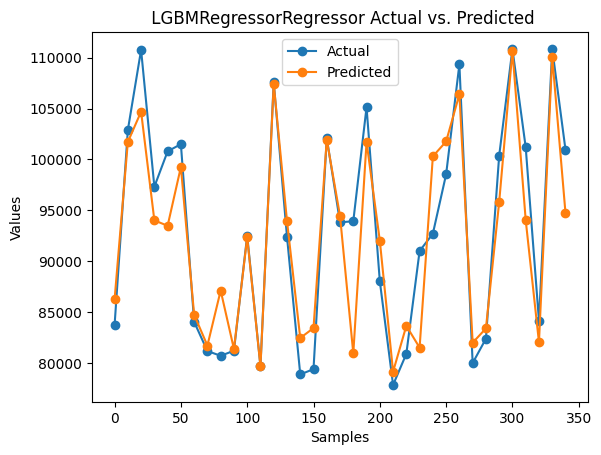

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

# 모델 생성 및 훈련
model = LGBMRegressor()
model.fit(X_train, y_train)

# 예측
predictions = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, predictions)
print(f'Test MSE: {mse**0.5}')
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, predictions)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, predictions)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# R2 Score (Coefficient of Determination)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")
x = np.arange(0, len(y_test), 10)  # 간격을 크게 설정하여 그래프 생성

# 그래프 그리기
plt.plot(x, y_test[::10], 'o-', label='Actual')  # 실제값 그래프
plt.plot(x, predictions[::10], 'o-', label='Predicted')  # 예측값 그래프

# 축과 레이블 설정
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title(' LGBMRegressorRegressor Actual vs. Predicted')
plt.legend()

# 그래프 출력
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 독립 변수들로 이루어진 데이터프레임 생성
X = df[['Corn','fourth','do','Cattle_Judged']]

# 상수항 추가

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

         feature       VIF
0           Corn  7.963531
1         fourth  2.809647
2             do  9.684442
3  Cattle_Judged  5.709363


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# 그레디언트 부스팅 모델 생성 및 학습
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
gb_model.fit(X_train, y_train)

# 학습된 모델을 사용하여 예측
y_pred = gb_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# R2 Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

Mean Squared Error: 2837050.804134651
MSE: 2837050.804134651
RMSE: 1684.354714463272
MAE: 1226.9429210843525
MAPE: 1.3143555129667732
R2 Score: 0.9765259263501986


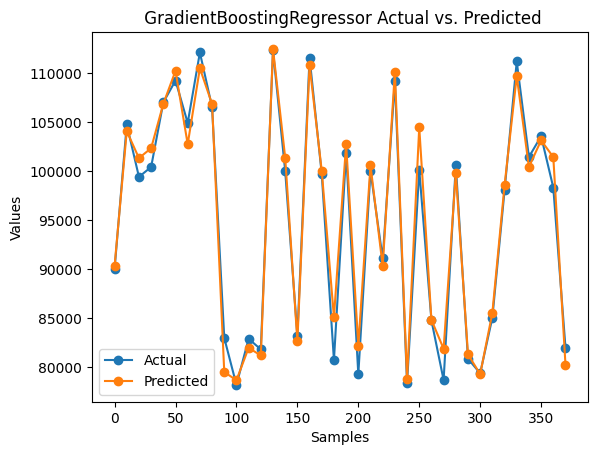

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# x 좌표
x = np.arange(0, len(y_test), 10)  # 간격을 크게 설정하여 그래프 생성

# 그래프 그리기
plt.plot(x, y_test[::10], 'o-', label='Actual')  # 실제값 그래프
plt.plot(x, y_pred[::10], 'o-', label='Predicted')  # 예측값 그래프

# 축과 레이블 설정
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title(' GradientBoostingRegressor Actual vs. Predicted')
plt.legend()

# 그래프 출력
plt.show()


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 4, 5]
}

# 그리드 서치 객체 생성
grid_search = GridSearchCV(gb_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 모델 성능 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

# 최적의 모델을 사용하여 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

NameError: ignored

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# XGBRegressor 모델 객체 생성
model = XGBRegressor()

# 탐색할 하이퍼파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 200, 300,400,500],  # 트리 개수
    'learning_rate': [0.1, 0.01, 0.001,0.0001],  # 학습률
    'max_depth': [3, 5, 7, 9, 10],  # 트리의 깊이
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],  # 트리에서 선택할 특성 비율
}

# GridSearchCV를 사용하여 그리드 서치 수행
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)  # X_train은 입력 변수, y_train은 타겟 변수

# 최적의 하이퍼파라미터 조합 및 모델 출력
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # 최적 모델의 평균 제곱근 오차(RMSE)

# 최적의 하이퍼파라미터로 모델 재학습
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}
Best Score: 54059.07168545797


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Test MSE: 232.5364556561709
MSE: 54073.203209134335
RMSE: 232.5364556561709
MAE: 163.11507509366288
MAPE: 4.962777413238442
R2 Score: 0.8164030423601106


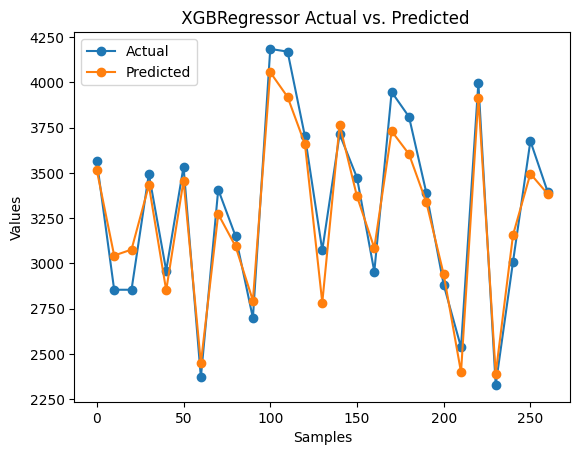

In [ ]:
from xgboost import XGBRegressor

# 모델 생성 및 훈련
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# 예측
predictions = xgb_model.predict(X_test)

# 성능 평가
xgb_mse = mean_squared_error(y_test, predictions)
print(f'Test MSE: {xgb_mse**0.5}')
# MSE (Mean Squared Error)
mse = mean_squared_error(y_test, predictions)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, predictions)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# R2 Score (Coefficient of Determination)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")
x = np.arange(0, len(y_test), 10)  # 간격을 크게 설정하여 그래프 생성

# 그래프 그리기
plt.plot(x, y_test[::10], 'o-', label='Actual')  # 실제값 그래프
plt.plot(x, predictions[::10], 'o-', label='Predicted')  # 예측값 그래프

# 축과 레이블 설정
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title(' XGBRegressor Actual vs. Predicted')
plt.legend()

# 그래프 출력
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

# 모델 초기화
xgb_model = XGBRegressor()

# 교차 검증 수행
scores = cross_val_score(xgb_model, features, target, cv=5, scoring='neg_mean_squared_error')

# MSE는 손실함수이므로, 값이 음수로 반환됩니다. -1을 곱해서 양의 MSE 값으로 바꿔줍니다.
mse_scores = -scores

# 각 폴드의 MSE 출력
print(f'MSE for each fold: {mse_scores}')

# 평균 MSE 출력
mse = mean_squared_error(y_test, predictions)

# RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, predictions)

# MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

# R2 Score (Coefficient of Determination)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
X = df[['Cattle_Judged ', 'Corn', 'Soybean', 'WTi','bey', 'ondo','do']]
y = df['fcow']

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(100, 7)))  # 입력의 모양은 (시간 단계의 수, 특징의 수)입니다.
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 불러오기
data = pd.read_csv('cowprice.csv')  # 'data.csv'에 실제 데이터 파일 이름을 입력하세요.

# 필요한 열 추출

# 결측치 처리
data = data.fillna(data.median())

# 데이터 스케일링
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 학습 데이터 생성
X = ['Cattle_Judged', 'Cattle_Trade_Meat', 'Corn', 'Soybean', 'WTi']
y = ['Cattle Price']
time_steps = 7  # 입력 sequence 길이
for i in range(len(data_scaled) - time_steps - 1):
    X.append(data_scaled[i:i + time_steps, :-1])  # 독립 변수 열만 선택
    y.append(data_scaled[i + time_steps, -1])  # 종속 변수 열 선택

X = np.array(X)
y = np.array(y)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# 훈련 및 테스트 데이터 분할
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(64, input_shape=(time_steps, len(X))))  # 수정된 부분
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 훈련
model.fit(X_train, y_train, epochs=100, batch_size=32)  # 수정된 부분

# 테스트 데이터 예측
y_pred = model.predict(tf.convert_to_tensor(X_test))  # 수정된 부분

# 예측 결과 역스케일링
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 예측 결과 출력
for i in range(len(y_pred)):
    print(f"실제값: {y_test[i]}, 예측값: {y_pred[i]}")
